# 2-Analyse des données

## 2.1. Librairies utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from collections import Counter

import itertools as it

import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

from unicodedata import normalize

from sklearn.feature_extraction.text import CountVectorizer

## 2.2. Description dataset

(11141, 3)


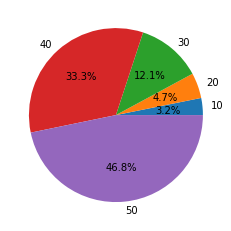

In [2]:
# r = pd.read_csv('scrap.csv')[['hotel','commentaire','note']]
# reviews = pd.concat([reviews,r])
# reviews.to_csv('reviews.csv',index=False)

reviews = pd.read_csv('reviews.csv')
print(reviews.shape)
l=range(10,60,10)
plt.pie([reviews.note.value_counts()[i] for i in l],labels=l,autopct='%1.1f%%')
plt.show()
# Si count<5% ajouter des data

## 2.3. Analyse des valeurs manquantes

hotel          0
commentaire    0
note           0
dtype: int64 
 hotel          0.0
commentaire    0.0
note           0.0
dtype: float64


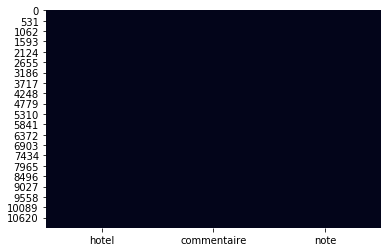

In [3]:
na = reviews.isnull().sum()
nap = na/len(reviews)
print(na,'\n',nap)
sns.heatmap(reviews.isna(),cbar=False)
plt.show()
#reviews.drop(reviews.columns[nan],axis=1,inplace=True)

## 2.4. Analyse des données

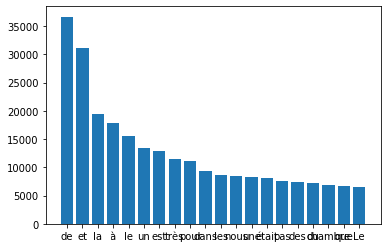

In [4]:
freq = pd.DataFrame(Counter(' '.join(reviews['commentaire']).split()).most_common(20))
plt.bar(freq[0],freq[1])
plt.show()
# mots fréquents = mots de liaison sans intérêt -> traitement pour les enlever

## 2.5. Traitement des données

### 2.5.1. Target Y : notes


In [5]:
reviews.note = reviews.note.map({50:1,40:1,30:0,20:0,10:0})

### 2.5.2. X : Commentaires

Il s'agit d'enlever les ponctuations et mots de liaison inutiles.

In [6]:
contraction_map = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
def preprocess(text,mapping=contraction_map):
    # Extension
    #contractions_pattern = re.compile('({})'.format('|'.join(mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    #def expand_match(t):
    #    match = t.group(0)
    #    t = mapping.get(match)\
    #            if mapping.get(match)\
    #            else mapping.get(match.lower())                       
    #    t = match[0] + t[1:]
    #    return t
    #text = contractions_pattern.sub(expand_match, text)
    #text = re.sub("'", "", text)
    # Enlever nombres et caractères spéciaux
    pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text).lower()
    # Enlever accents
    text = normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Stemmer
    text = ' '.join([PorterStemmer().stem(mot) for mot in word_tokenize(text)])
    # Lemmetize
    text = ' '.join([WordNetLemmatizer.lemmatize(1,mot) for mot in word_tokenize(text)])
    # Enlever ponctuation
    ponc = '[]\^_'
    textp = ''
    for mot in word_tokenize(text):
        if mot not in ponc and mot not in stopwords.words('french'):
            textp += mot + ' '
    return textp

In [ ]:
reviews["commentaire"] = reviews["commentaire"].apply(preprocess)

## 2.6 Analyse 2

            0      1
0        très  12357
1     chambre   7621
2           a   6796
3   personnel   5409
4       petit   5273
5        bien   5218
6       hôtel   4954
7     l'hôtel   4548
8         cet   4024
9        tout   3423
10          !   3301
11   chambres   3173
12      c'est   3006
13   déjeuner   2978
14       plus   2850
15        bon   2809
16       j'ai   2764
17          ã   2335
18      paris   2282
19      salle   2263


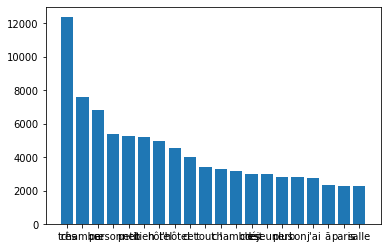

            0     1
0     chambre  1959
1           a  1520
2        très  1493
3       hôtel   872
4        bien   843
5       petit   842
6        plus   756
7     l'hôtel   754
8           ã   744
9         cet   730
10      c'est   718
11  personnel   706
12       j'ai   668
13   chambres   633
14       tout   554
15         si   542
16      salle   532
17        peu   480
18          !   477
19   déjeuner   420


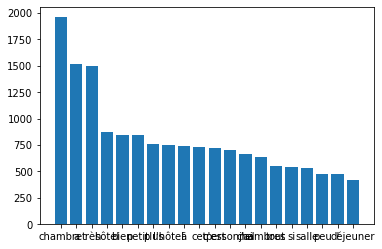

            0      1
0        très  10864
1     chambre   5662
2           a   5276
3   personnel   4703
4       petit   4431
5        bien   4375
6       hôtel   4082
7     l'hôtel   3794
8         cet   3294
9        tout   2869
10          !   2824
11   déjeuner   2558
12   chambres   2540
13        bon   2416
14      c'est   2288
15       j'ai   2096
16       plus   2094
17      paris   2023
18      salle   1731
19          ã   1591


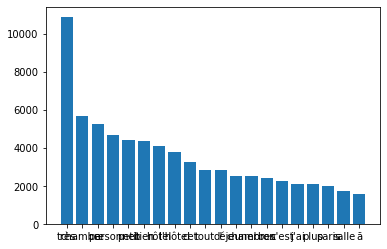

In [33]:
freq = pd.DataFrame(Counter(' '.join(reviews['commentaire']).split()).most_common(20))
print(freq)
plt.bar(freq[0],freq[1])
plt.show()
# mots fréquents = mots de liaison sans intérêt -> traitement pour les enlever
freqneg = pd.DataFrame(Counter(' '.join(reviews['commentaire'][i] for i in range(len(reviews)) if reviews['note'][i]==0).split()).most_common(20))
print(freqneg)
plt.bar(freqneg[0],freqneg[1])
plt.show()
#3
freqpos = pd.DataFrame(Counter(' '.join(reviews['commentaire'][i] for i in range(len(reviews)) if reviews['note'][i]==1).split()).most_common(20))
print(freqpos)
plt.bar(freqpos[0],freqpos[1])
plt.show()

## Reviews preprocess

In [29]:
reviews.to_csv('reviewsp.csv',index=False)